# 1. 라이브러리 import 및 데이터 불러오기

In [ ]:
# 필수 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/TNT/산업인공지능/실습/Task2/LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


# 2. EDA

In [ ]:
df.info()

# waferMap : waferMap
# die size : chip의 wafer상에서 면적  # die : chip
# lotName : lot - 제조단위가 동일한 조건 아래에서 만들어진 균일한 특성 및 품질을 갖는 제품군, wafer는 lot 단위로 제조되며 일반적으로 lot당 최대 25개의 wafer 제조
# waferIndex : 하나의 lot에서 각 wafer에 붙는 번호
# trianTestLabel : The training / test set were already split by domain experts
# failureType : 결함 타입

# 데이터 개수 : 811457
# object 타입 : waferMap, lotName, trianTestLabel, failureType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
# trianTestLabel 이름 변경
df.rename(columns = {'trianTestLabel':'trainTestLabel'}, inplace = 'True')
df.columns

Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trainTestLabel',
       'failureType'],
      dtype='object')

In [ ]:
df.head(26)

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,6.0,[[Training]],[[none]]
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,7.0,[[Training]],[[none]]
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,8.0,[[Training]],[[none]]
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,9.0,[[Training]],[[none]]
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,10.0,[[Training]],[[none]]


In [ ]:
df.tail()

# trainTestLabel, failureType 결측치 존재

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


## 1) 데이터 정리

In [ ]:
df['trainTestLabel'][0]

array([['Training']], dtype='<U8')

In [ ]:
df['trainTestLabel'][0].shape

(1, 1)

In [ ]:
df['trainTestLabel'][811455]

array([], shape=(0, 0), dtype=float64)

In [ ]:
# trainTestLabel, failureType [] 제거하는 함수
def extract(x):
  if x.shape == (1, 1):
    return x[0][0]
  
  else:
    return None

In [ ]:
# trainTestLabel, failureType [] 제거
df['trainTestLabel'] = df['trainTestLabel'].apply(lambda x: extract(x))
df['failureType'] = df['failureType'].apply(lambda x: extract(x))

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,None,None
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,None,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
# null 제거
df2 = df.dropna(axis = 0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 0 to 811454
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        172950 non-null  object 
 1   dieSize         172950 non-null  float64
 2   lotName         172950 non-null  object 
 3   waferIndex      172950 non-null  float64
 4   trainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.2+ MB


In [ ]:
df2.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring


## 2) 데이터 확인

### (1) 범주형 데이터 ['lotName', 'waferIndex', 'trainTestLabel', 'failureType']

In [ ]:
# unique 값 확인하는 함수
def unique(x):
  print("--------< ", x.name, " >--------")
  print("unique : ", x.unique())
  print("num of unique : ", x.unique().shape[0], "\n")
  print(x.value_counts(), "\n\n")

# unique 값 확인
categorical_cols = ['lotName', 'waferIndex', 'trainTestLabel', 'failureType'] # 범주형 데이터
df2[categorical_cols].apply(lambda x: unique(x))


# lotName, waferIndex : one-hot encoding을 해서 넣을 만큼 중요한 데이터는 아닌 듯
# trainTestLabel : Test > train이기 때문에 무시하고 다시 train_test_split 하는게 좋을 듯

--------<  lotName  >--------
unique :  ['lot1' 'lot2' 'lot3' ... 'lot47540' 'lot47541' 'lot47542']
num of unique :  10762 

lot42444    25
lot47041    25
lot47428    25
lot44762    25
lot45726    25
            ..
lot26411     1
lot8979      1
lot14343     1
lot18054     1
lot26337     1
Name: lotName, Length: 10762, dtype: int64 


--------<  waferIndex  >--------
unique :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
num of unique :  25 

22.0    6968
12.0    6955
15.0    6951
25.0    6951
16.0    6942
6.0     6939
3.0     6939
18.0    6937
14.0    6934
1.0     6933
2.0     6922
10.0    6921
21.0    6916
23.0    6916
8.0     6915
20.0    6902
17.0    6901
11.0    6900
5.0     6899
13.0    6899
24.0    6894
7.0     6894
19.0    6886
4.0     6882
9.0     6854
Name: waferIndex, dtype: int64 


--------<  trainTestLabel  >--------
unique :  ['Training' 'Test']
num of unique :  2 

Test        118595
Training     54355
Name: train

lotName           None
waferIndex        None
trainTestLabel    None
failureType       None
dtype: object

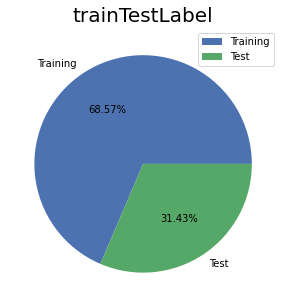

In [ ]:
# pie chart : trainTestLabel

plt.rcParams['figure.figsize'] = (5,5)
labels = df2['trainTestLabel'].unique()
size = df['trainTestLabel'].value_counts()

plt.style.use('seaborn-deep')
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.axis('off')
plt.title('trainTestLabel', fontsize = 20)
plt.legend()
plt.show()

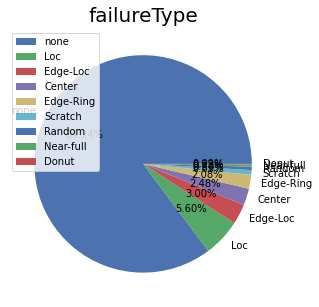

In [ ]:
# pie chart : failureType

plt.rcParams['figure.figsize'] = (5,5)
labels = df2['failureType'].unique()
size = df['failureType'].value_counts()

plt.style.use('seaborn-deep')
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.axis('off')
plt.title('failureType', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
labels

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch',
       'Random', 'Near-full', 'Donut'], dtype=object)

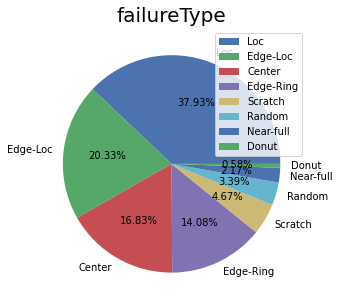

In [ ]:
# pie chart : failureType  # none 제외

plt.rcParams['figure.figsize'] = (5,5)

plt.style.use('seaborn-deep')
plt.pie(size.drop('none'), labels = np.delete(labels, 0), autopct = "%.2f%%")
plt.axis('off')
plt.title('failureType', fontsize = 20)
plt.legend()
plt.show()

### (2) 이미지 데이터 ['waferMap']

In [ ]:
df2['waferMap'][0].shape

(45, 48)

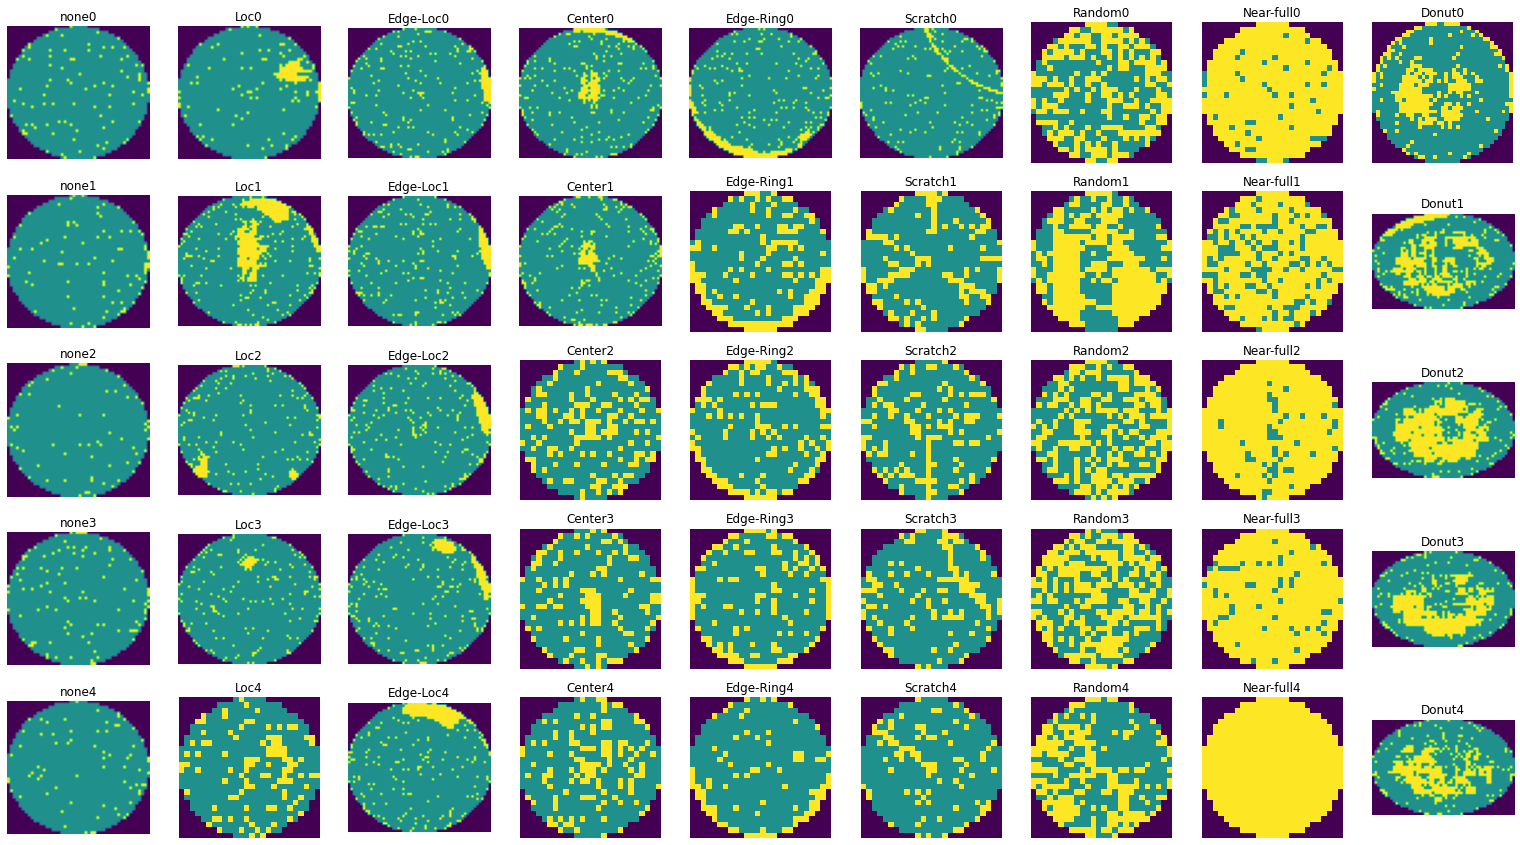

In [ ]:
# 시각화

failureType_cols = df2['failureType'].unique()

rows = 5
cols = len(failureType_cols)
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(cols):
  for row, wafermap in enumerate(df2[df2['failureType'] == failureType_cols[col]]['waferMap'][:rows]):
    r = row
    c = col
    ax = axes[r][c]
    ax.imshow(wafermap)
    ax.set_title(failureType_cols[col] + str(row))
    ax.axis('off')

plt.show()

# 이미지 크기가 다른가?

In [ ]:
# 이미지 크기 확인

df2['waferMap'].apply(lambda x: x.shape).unique()

array([(45, 48), (53, 58), (26, 26), (70, 58), (60, 40), (37, 37),
       (37, 55), (41, 57), (39, 39), (62, 75), (50, 43), (43, 43),
       (36, 34), (42, 43), (75, 63), (32, 36), (102, 66), (54, 71),
       (29, 29), (38, 45), (41, 41), (118, 84), (54, 42), (42, 29),
       (49, 39), (35, 38), (41, 56), (43, 42), (26, 25), (30, 30),
       (33, 29), (34, 34), (52, 55), (35, 31), (30, 34), (50, 39),
       (33, 33), (32, 29), (63, 62), (34, 35), (39, 31), (38, 36),
       (69, 73), (25, 27), (113, 71), (26, 30), (29, 30), (40, 40),
       (87, 89), (70, 36), (56, 41), (89, 76), (52, 59), (33, 24),
       (36, 36), (45, 46), (76, 64), (87, 74), (53, 54), (42, 61),
       (114, 90), (44, 44), (35, 36), (64, 71), (31, 28), (75, 75),
       (137, 116), (39, 37), (30, 31), (47, 42), (27, 30), (45, 45),
       (51, 30), (72, 43), (59, 55), (58, 59), (62, 76), (29, 45),
       (31, 31), (48, 49), (63, 59), (89, 90), (41, 39), (76, 71),
       (73, 67), (40, 42), (71, 63), (22, 35), (36, 41),

In [ ]:
df2['waferMap'].apply(lambda x: x.shape).value_counts()

# 이미지 사이즈 조절이 필요하다

(25, 27)     18781
(26, 26)     14366
(30, 34)     12400
(29, 26)     11751
(27, 25)     10682
             ...  
(27, 15)         1
(58, 54)         1
(71, 70)         1
(53, 44)         1
(43, 133)        1
Name: waferMap, Length: 346, dtype: int64

### (3) 수치형 데이터 ['dieSize']

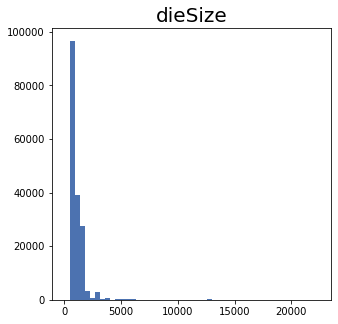

In [ ]:
plt.hist(df2['dieSize'], bins = 50)
plt.title('dieSize', fontsize = 20)
plt.show()

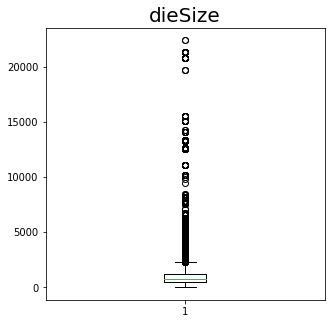

In [ ]:
plt.boxplot(df2['dieSize'])
plt.title('dieSize', fontsize = 20)
plt.show()

# 이상치 존재